In [2]:
pip install pandas matplotlib # Installing libraries like pandas,matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import sqlite3

# Step 1: Connect to SQLite DB
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Step 3: Insert sample data
sample_data = [
    ('Pen', 10, 5),
    ('Notebook', 3, 20),
    ('Pencil', 20, 2),
    ('Pen', 15, 5),
    ('Notebook', 2, 20),
    ('Pencil', 10, 2)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Save and close connection
conn.commit()
conn.close()


In [4]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect('sales_data.db')

# Run SQL query
query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print the result
print(df)


    product  total_qty  revenue
0  Notebook          5    100.0
1       Pen         25    125.0
2    Pencil         30     60.0


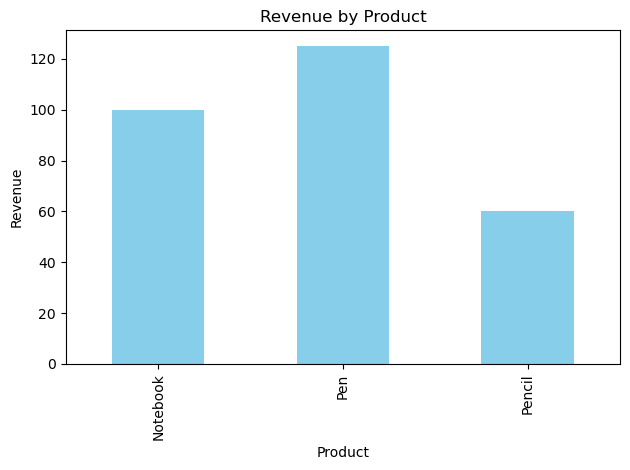

In [5]:
import matplotlib.pyplot as plt

# Plot bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('sales_chart.png')  # Save image
plt.show()
